**Visualizations for the dat_files dataset**

Visualizations for the averaged dataset are done in this notebook. Visualizations are done using MNE.

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Switch directory to that with dataset files

In [ ]:
%cd drive/My\ Drive/dat_files

**Files are of the format: FM#_XY**

**Where # is participant number, X=1 for fear or 2 for anger, and Y=1 for dynamic or 2 for static**

Install MNE

In [ ]:
pip install mne

     |████████████████████████████████| 6.6MB 2.2MB/s 


**Imports**

In [ ]:
import mne
from matplotlib import pyplot as plt
import numpy as np
import glob
import csv
import os
from os.path import splitext
import pandas as pd

**Grab csv files apply labels (0 for fear, 1 for anger)**

In [ ]:
static_files = np.array([])
static_labels = np.array([], dtype=int)
#get all static files
for file in glob.iglob("*2.csv"):
  static_files = np.append(static_files, file)
  if file[5] == '1':
    static_labels = np.append(static_labels, 0)
  else:
    static_labels = np.append(static_labels, 1)

In [ ]:
dyn_files = np.array([])
dyn_labels = np.array([], dtype=int)
#get all static files
for file in glob.iglob("*1.csv"):
  dyn_files = np.append(dyn_files, file)
  if file[5] == '1':
    dyn_labels = np.append(dyn_labels, 0)
  else:
    dyn_labels = np.append(dyn_labels, 1)

**Grab files by fear or anger**

**Label 0 for static, 1 for dynamic**

In [ ]:
fear_files = np.array([])
#labels file as 0 for static, 1 for dynamic
fear_labels = np.array([], dtype=int)
#saves participant number as group
fear_groups = np.array([], dtype=int)

#go through fear files
for file in glob.iglob("*_1*.csv"):
  fear_files = np.append(fear_files, file)
  fear_groups = np.append(fear_groups, file[2:4])
  #label as static or dynamic
  if file[6] == '1':
    fear_labels = np.append(fear_labels, 1)
  else:
    fear_labels = np.append(fear_labels, 0)

In [ ]:
anger_files = np.array([])
#labels file as 0 for static, 1 for dynamic
anger_labels = np.array([], dtype=int)
#saves participant number as group
anger_groups = np.array([], dtype=int)

#go through anger files
for file in glob.iglob("*_2*.csv"):
  anger_files = np.append(anger_files, file)
  anger_groups = np.append(anger_groups, file[2:4])
  #label as static or dynamic
  if file[6] == '1':
    anger_labels = np.append(anger_labels, 1)
  else:
    anger_labels = np.append(anger_labels, 0)

**Read csv files as pandas dataframes and clean up channel names**

**Remove brackets from channel names also to match with names in montage**


In [ ]:
#save DFs as dict with pair file: dataframe
static_dict = {}
#rows to skip
skip_rows = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19])

#read in static csvs as pandas df
for x in range(0, static_files.size):
  df = pd.read_csv(static_files[x], sep='\t', skiprows=skip_rows, header=(0))
  #remove whitespace from channel names
  for y in range(0, len(df.columns)):
    ch_name = df.iloc[0:,y].name
    #remove whitespace
    new_name = ''.join(ch_name.split())
    #remove brackets from channel name
    new_name = new_name.replace('[', '')
    new_name = new_name.replace(']', '')
    #rename column
    df.rename(columns={ch_name: new_name}, inplace=True)
  #add file: df pair to dict
  static_dict[static_files[x]] = df

In [ ]:
#save DFs as dict with pair file: dataframe
dyn_dict = {}
#rows to skip
skip_rows = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19])

#read in static csvs as pandas df
for x in range(0, dyn_files.size):
  df = pd.read_csv(dyn_files[x], sep='\t', skiprows=skip_rows, header=(0))
  #remove whitespace from channel names
  for y in range(0, len(df.columns)):
    ch_name = df.iloc[0:,y].name
    #remove whitespace
    new_name = ''.join(ch_name.split())
    #remove brackets from channel name
    new_name = new_name.replace('[', '')
    new_name = new_name.replace(']', '')
    #rename column
    df.rename(columns={ch_name: new_name}, inplace=True)
  #add file: df pair to dict
  dyn_dict[dyn_files[x]] = df

In [ ]:
#save DFs as dict with pair file: dataframe
fear_dict = {}
#rows to skip
skip_rows = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19])

#read in static csvs as pandas df
for x in range(0, fear_files.size):
  df = pd.read_csv(fear_files[x], sep='\t', skiprows=skip_rows, header=(0))
  #remove whitespace from channel names
  for y in range(0, len(df.columns)):
    ch_name = df.iloc[0:,y].name
    #remove whitespace
    new_name = ''.join(ch_name.split())
    #remove brackets from channel name
    new_name = new_name.replace('[', '')
    new_name = new_name.replace(']', '')
    #rename column
    df.rename(columns={ch_name: new_name}, inplace=True)
  #add file: df pair to dict
  fear_dict[fear_files[x]] = df

In [ ]:
#save DFs as dict with pair file: dataframe
anger_dict = {}
#rows to skip
skip_rows = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19])

#read in static csvs as pandas df
for x in range(0, anger_files.size):
  df = pd.read_csv(anger_files[x], sep='\t', skiprows=skip_rows, header=(0))
  #remove whitespace from channel names
  for y in range(0, len(df.columns)):
    ch_name = df.iloc[0:,y].name
    #remove whitespace
    new_name = ''.join(ch_name.split())
    #remove brackets from channel name
    new_name = new_name.replace('[', '')
    new_name = new_name.replace(']', '')
    #rename column
    df.rename(columns={ch_name: new_name}, inplace=True)
  #add file: df pair to dict
  anger_dict[anger_files[x]] = df

**Drop unnamed channels**

In [ ]:
#drop unnamed channels in dict
for key, value in static_dict.items():
  if "Unnamed:65" in value.columns:
    value.drop(columns=["Unnamed:65"], inplace=True)
  if "Unnamed:66" in value.columns:
    value.drop(columns=["Unnamed:66"], inplace=True)

In [ ]:
#drop unnamed channels in dict
for key, value in dyn_dict.items():
  if "Unnamed:65" in value.columns:
    value.drop(columns=["Unnamed:65"], inplace=True)
  if "Unnamed:66" in value.columns:
    value.drop(columns=["Unnamed:66"], inplace=True)

In [ ]:
for key, value in fear_dict.items():
  if "Unnamed:65" in value.columns:
    value.drop(columns=["Unnamed:65"], inplace=True)
  if "Unnamed:66" in value.columns:
    value.drop(columns=["Unnamed:66"], inplace=True)

In [ ]:
for key, value in anger_dict.items():
  if "Unnamed:65" in value.columns:
    value.drop(columns=["Unnamed:65"], inplace=True)
  if "Unnamed:66" in value.columns:
    value.drop(columns=["Unnamed:66"], inplace=True)

**Convert DFs to np 3D array**

In [ ]:
static_nps = {}

for key, value in static_dict.items():
  static_nps[key] = value.to_numpy()

In [ ]:
dyn_nps = {}

for key, value in dyn_dict.items():
  dyn_nps[key] = value.to_numpy()

In [ ]:
fear_nps = {}

for key, value in fear_dict.items():
  fear_nps[key] = value.to_numpy()

In [ ]:
anger_nps = {}

for key, value in anger_dict.items():
  anger_nps[key] = value.to_numpy()

**Create MNE Raw & Evoked object**

In [ ]:
#get channel names as a list (to be compatible with create_info)
ch_names = static_dict['FM01_12.csv'].columns.to_numpy().tolist()
#channel types
ch_types = ['eeg' for x in range(64)]
ch_types.extend(['eog', 'eog'])
#create info dictionary (our dataset has freq of 1000 Hertz)
info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=1000)
print(info)

#get data from numpy array
#one for fear stimulus
#data = static_nps['FM01_12.csv'].T
#print(data.shape)
#one for anger stimulus
#anger_data = static_nps['FM01_22.csv'].T

fear_stim_data = {}
anger_stim_data = {}
#get array of fear and anger stimulus data

for key, value in static_nps.items():
  if key[5] == '1':
    fear_stim_data[key] = value.T  
  else:
    anger_stim_data[key] = value.T  

#create Raw object
#raw = mne.io.RawArray(data, info=info)

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 64 EEG, 2 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 1000.0 Hz
>


**Plot Channels**

In [ ]:
#plot all fear stimuli for static files
for key, value in fear_stim_data.items():
  raw = mne.io.RawArray(value, info=info)
  print ("printing : ", key)
  #plot channels by sets of 11
  raw.plot(order=[x for x in range (0, 11)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (11, 22)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (22, 33)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (33, 44)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (44, 55)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (55, 66)], scalings='auto', n_channels=11)

In [ ]:
#plot all anger stimuli for static files
for key, value in anger_stim_data.items():
  raw = mne.io.RawArray(value, info=info)
  print ("printing : ", key)
  #plot channels by sets of 11
  raw.plot(order=[x for x in range (0, 11)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (11, 22)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (22, 33)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (33, 44)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (44, 55)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (55, 66)], scalings='auto', n_channels=11)

In [ ]:
#plot all fear stimuli for dynamic files
for key, value in fear_dyn_data.items():
  raw = mne.io.RawArray(value, info=info)
  print ("printing : ", key)
  #plot channels by sets of 11
  raw.plot(order=[x for x in range (0, 11)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (11, 22)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (22, 33)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (33, 44)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (44, 55)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (55, 66)], scalings='auto', n_channels=11)

In [ ]:
#plot all anger stimuli for dynamic files
for key, value in anger_dyn_data.items():
  raw = mne.io.RawArray(value, info=info)
  print ("printing : ", key)
  #plot channels by sets of 11
  raw.plot(order=[x for x in range (0, 11)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (11, 22)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (22, 33)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (33, 44)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (44, 55)], scalings='auto', n_channels=11)
  raw.plot(order=[x for x in range (55, 66)], scalings='auto', n_channels=11)

**Create Montage from configuration file**

In [ ]:
ch_pos = {}
#read in file
with open("/content/drive/.shortcut-targets-by-id/18yMiEffvleEvm-SgHWpUF4gykxlNYuzj/SynAmps2-RT-Config/SynAmps2-Quik-Cap64.csv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for line in enumerate(reader):
        #get values of column
        values = [line[1][1], line[1][2], line[1][3]]
        #add column: values pair
        ch_pos[line[1][0].lstrip()] = pd.to_numeric(values)

#turn data into montage
data = mne.utils.Bunch(
    ch_pos=ch_pos,
    nasion=ch_pos['Nasion'],
    lpa=ch_pos['Left'],
    rpa=ch_pos['Right'])

#make dig montage
montage = mne.channels.make_dig_montage(**data)

**Plot Signal Traces**

In [ ]:
#plot all fear stimuli for static files
for key, value in fear_stim_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot(exclude=[])
  #fig.savefig('figures/signal_traces/'+key[0:7]+'.pdf')

In [ ]:
#plot all fear stimuli for dynamic files
for key, value in fear_dyn_data.items():
  evk = mne.EvokedArray(value, info=info)
  print ("printing : ", key)
  fig = evk.plot(exclude=[])
  #fig.savefig('figures/signal_traces/'+key[0:7]+'.pdf')

In [ ]:
#plot all anger stimuli for static files
for key, value in anger_stim_data.items():
  evk = mne.EvokedArray(value, info=info)
  print ("printing : ", key)
  fig = evk.plot(exclude=[])
  #fig.savefig('figures/signal_traces/'+key[0:7]+'.pdf')

In [ ]:
#plot all anger stimuli for dynamic files
for key, value in anger_dyn_data.items():
  evk = mne.EvokedArray(value, info=info)
  print ("printing : ", key)
  fig = evk.plot(exclude=[])
  #fig.savefig('figures/signal_traces/'+key[0:7]+'.pdf')

**Plot signal traces with GFP**

In [ ]:
#plot all fear stimuli for static files
for key, value in fear_stim_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot(picks='eeg', spatial_colors=True, gfp=True, window_title=key)
  #fig.savefig('figures/gfp_signal_traces/'+key+'.pdf')

In [ ]:
#plot all fear stimuli for dynamic files
for key, value in fear_dyn_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot(picks='eeg', spatial_colors=True, gfp=True, window_title=key)
  #fig.savefig('figures/gfp_signal_traces/'+key+'.pdf')

In [ ]:
#plot all anger stimuli for static files
for key, value in anger_stim_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot(picks='eeg', spatial_colors=True, gfp=True, window_title=key)
  #fig.savefig('figures/gfp_signal_traces/'+key+'.pdf')

In [ ]:
#plot all anger stimuli for dynamic files
for key, value in anger_dyn_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot(picks='eeg', spatial_colors=True, gfp=True, window_title=key)
  #fig.savefig('figures/gfp_signal_traces/'+key+'.pdf')

**Compare Evokes**

printing:  FM03
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


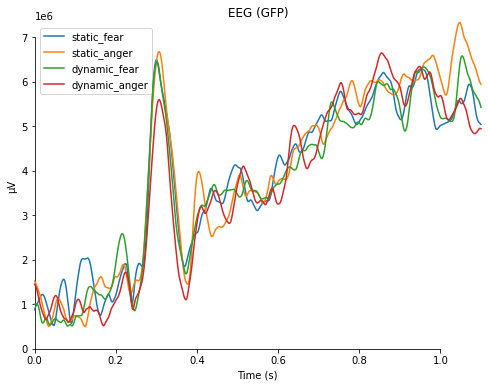

printing:  FM04
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


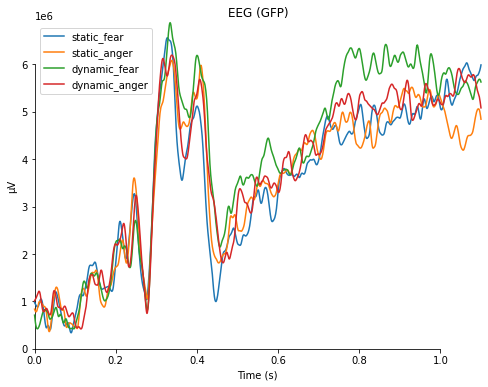

printing:  FM05
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


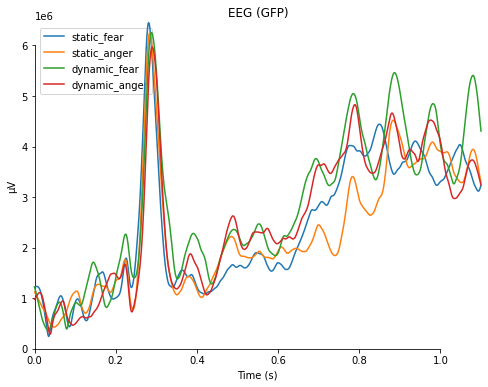

printing:  FM01
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


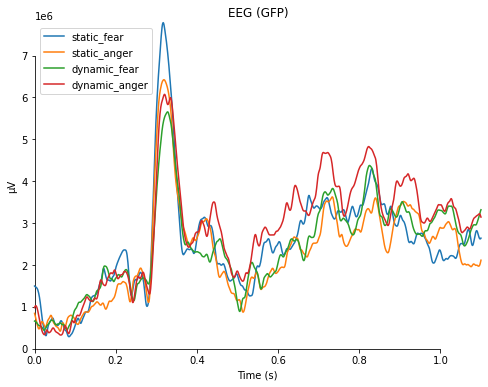

printing:  FM06
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


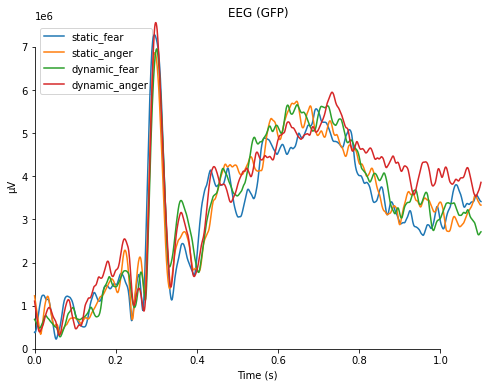

printing:  FM07
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


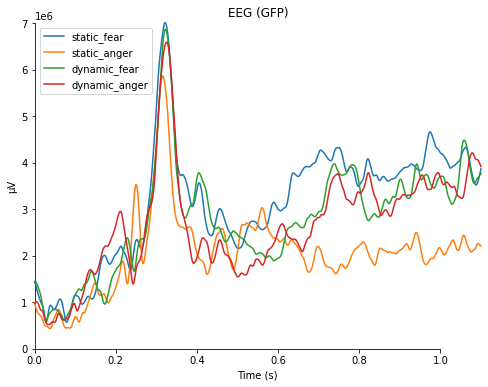

printing:  FM08
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


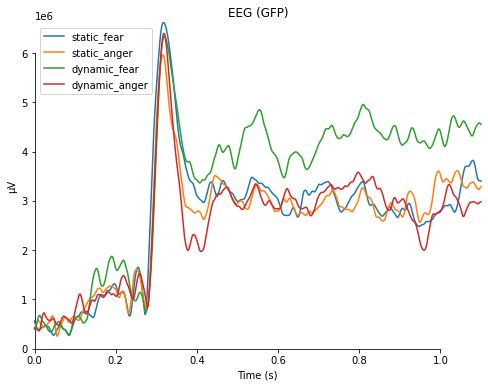

printing:  FM09
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


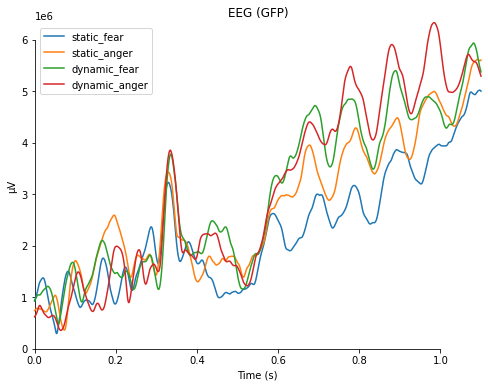

printing:  FM10
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


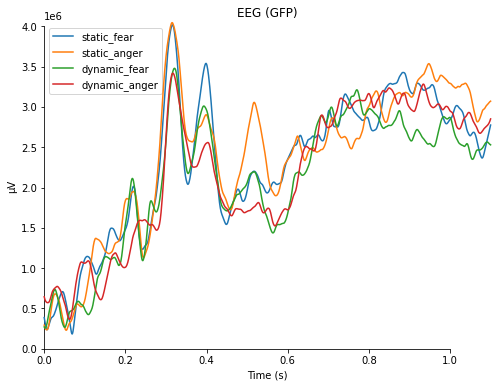

printing:  FM11
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


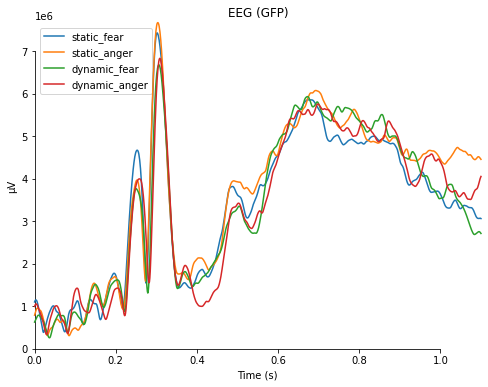

printing:  FM12
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


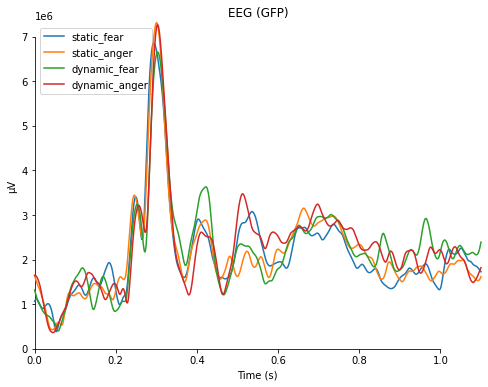

printing:  FM13
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


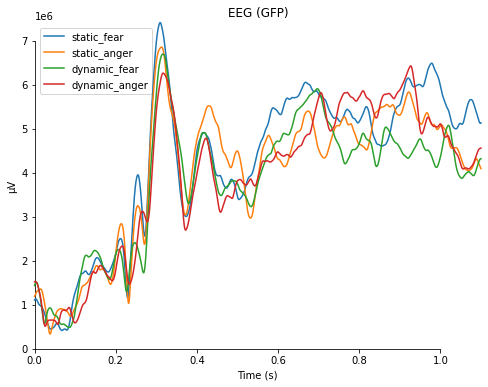

printing:  FM14
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


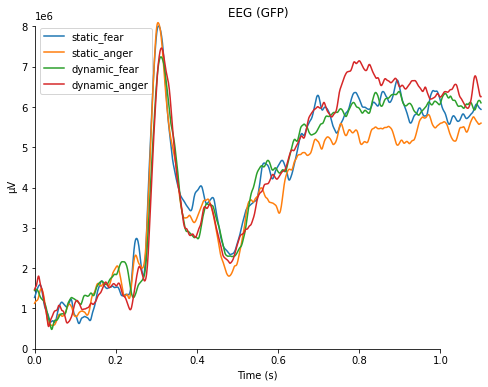

printing:  FM15
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


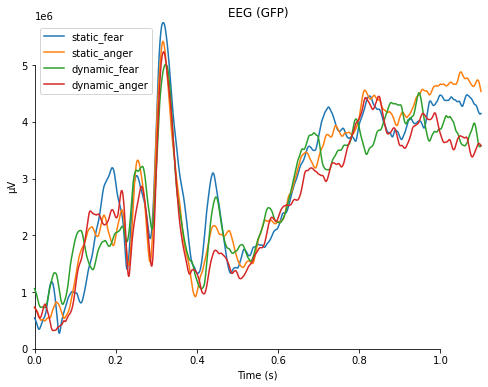

printing:  FM16
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


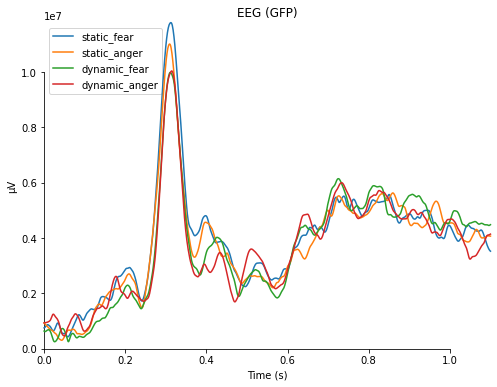

printing:  FM17
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


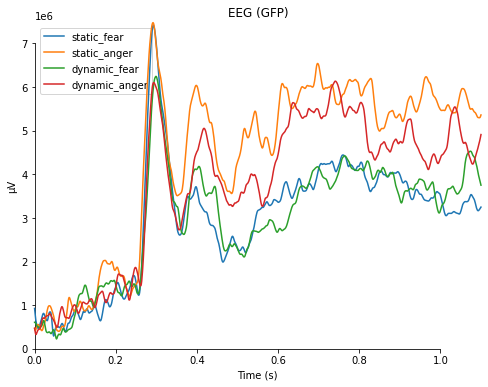

printing:  FM18
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


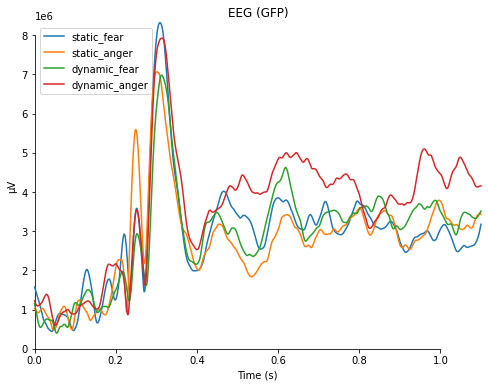

printing:  FM19
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


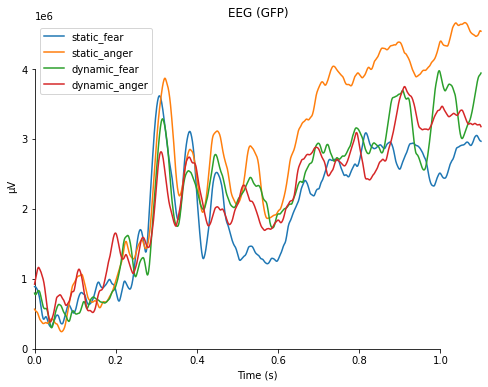

printing:  FM20
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


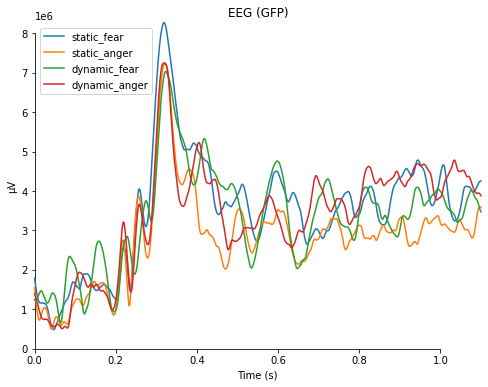

printing:  FM21
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


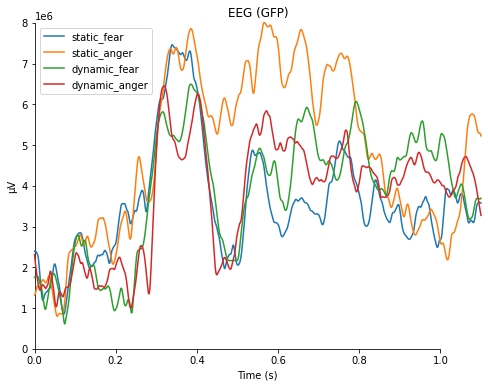

printing:  FM22
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


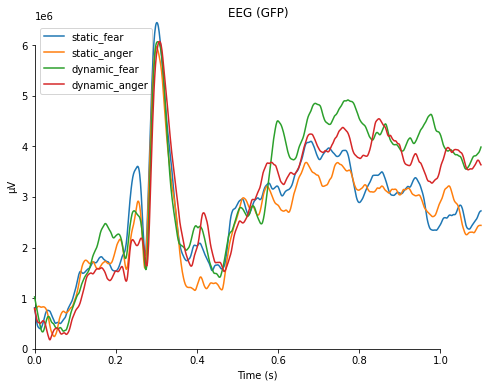

printing:  FM23
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


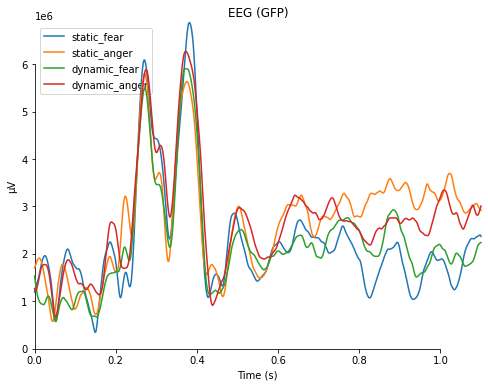

printing:  FM24
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


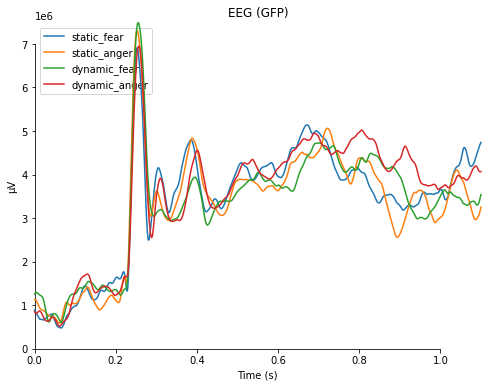

In [ ]:
#compare all four classes for each user
for key, value in fear_stim_data.items():
  evks = {}
  person_no = key[0:4]
  static_anger = person_no + '_22.csv'
  dyn_fear = person_no + key[4:6] + '1.csv'
  dyn_anger = person_no + '_21.csv'
  evks['static_fear'] = mne.EvokedArray(value, info=info)
  evks['static_anger'] = mne.EvokedArray(static_nps[static_anger].T, info=info)
  evks['dynamic_fear'] = mne.EvokedArray(dyn_nps[dyn_fear].T, info=info)
  evks['dynamic_anger'] = mne.EvokedArray(dyn_nps[dyn_anger].T, info=info)
  print ("printing: ", person_no)
  fig = mne.viz.plot_compare_evokeds(evks, picks='eeg')
  #fig[0].savefig('figures/compare_evokeds/'+person_no+'.pdf')

In [ ]:
#compare plots for static vs dynamic files
for key, value in static_nps.items():
  evks = {}
  person_no = key[0:4]
  dyn_file = person_no + key[4:6] + '1.csv'
  evks['static'] = mne.EvokedArray(value.T, info=info)
  evks['dynamic'] = mne.EvokedArray(dyn_nps[dyn_file].T, info=info)
  print ("printing: ", key, " vs ", dyn_file)
  mne.viz.plot_compare_evokeds(evks, picks='eeg', linestyles=dict(dynamic='solid', static='dashed'))

In [ ]:
#loop through static fear and anger stimuli
for key, value in fear_stim_data.items():
  person_no = key[0:4]
  anger_file = person_no + '_22.csv'
  evks['fear'] = mne.EvokedArray(value, info=info)
  evks['anger'] = mne.EvokedArray(anger_stim_data[anger_file], info=info)
  print ("printing: ", key, " vs ", anger_file)
  mne.viz.plot_compare_evokeds(evks, picks='eeg', linestyles=dict(anger='solid', fear='dashed'))

In [ ]:
#compare dynamic fear vs anger stimuli
for key, value in fear_dyn_data.items():
  person_no = key[0:4]
  anger_file = person_no + '_21.csv'
  evks['fear'] = mne.EvokedArray(value, info=info)
  evks['anger'] = mne.EvokedArray(anger_dyn_data[anger_file], info=info)
  print ("printing: ", key, " vs ", anger_file)
  mne.viz.plot_compare_evokeds(evks, picks='eeg', linestyles=dict(anger='solid', fear='dashed'))

**Image Plots**

In [ ]:
#plot all static fear vs anger stimuli
for key, value in fear_stim_data.items():
  person_no = key[0:4]
  anger_file = person_no + '_22.csv'
  fear_evk = mne.EvokedArray(value, info=info)
  anger_evk = mne.EvokedArray(anger_stim_data[anger_file], info=info)
  print ("printing : ", key, " vs ", anger_file)
  fear_evk.plot_image(picks='eeg')
  anger_evk.plot_image(picks='eeg')

In [ ]:
#plot all dynamic fear vs anger stimuli
for key, value in fear_dyn_data.items():
  person_no = key[0:4]
  anger_file = person_no + '_21.csv'
  fear_evk = mne.EvokedArray(value, info=info)
  anger_evk = mne.EvokedArray(anger_dyn_data[anger_file], info=info)
  print ("printing : ", key, " vs ", anger_file)
  fear_evk.plot_image(picks='eeg')
  anger_evk.plot_image(picks='eeg')

**Topographical subplots**

In [ ]:
#compare all four classes for each user
for key, value in fear_stim_data.items():
  evks = {}
  person_no = key[0:4]
  static_anger = person_no + '_22.csv'
  dyn_fear = person_no + key[4:6] + '1.csv'
  dyn_anger = person_no + '_21.csv'
  evks['static_fear'] = mne.EvokedArray(value, info=info)
  evks['static_anger'] = mne.EvokedArray(static_nps[static_anger].T, info=info)
  evks['dynamic_fear'] = mne.EvokedArray(dyn_nps[dyn_fear].T, info=info)
  evks['dynamic_anger'] = mne.EvokedArray(dyn_nps[dyn_anger].T, info=info)
  #set montage for each evoked object in dict
  for key in evks:
    evks[key].set_montage(montage, match_case=False)
  print ("printing: ", person_no)
  fig = mne.viz.plot_compare_evokeds(evks, picks='eeg', axes='topo')
  fig[0].savefig('figures/top_subplots/'+person_no+'.pdf')

Output hidden; open in https://colab.research.google.com to view.

**Plot Sensor Positions**

1 duplicate electrode labels found:
REF./Right
Plotting 72 unique labels.
Creating RawArray with float64 data, n_channels=72, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


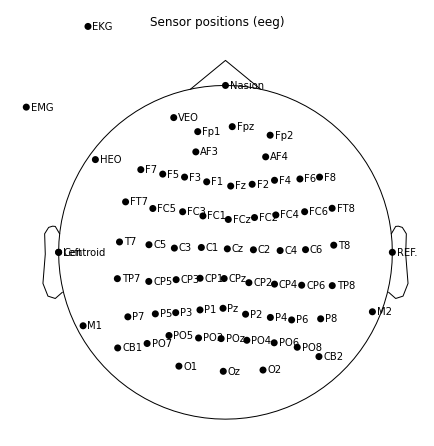

In [ ]:
fig = montage.plot()
#fig.savefig('figures/montage.pdf')

In [ ]:
montage.plot(kind='3d')

**Scalp Topography**

printing :  FM03_12.csv


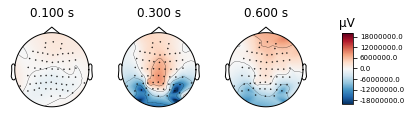

printing :  FM04_12.csv


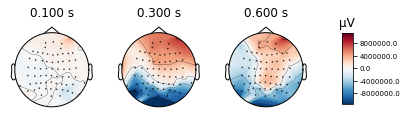

printing :  FM05_12.csv


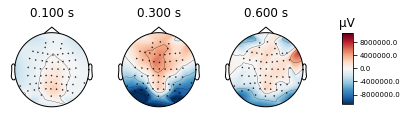

printing :  FM01_12.csv


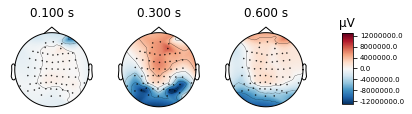

printing :  FM06_12.csv


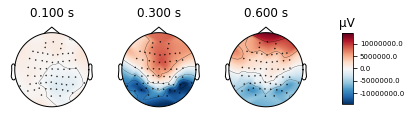

printing :  FM07_12.csv


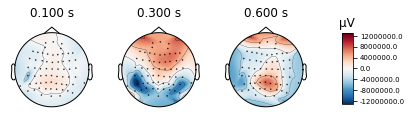

printing :  FM08_12.csv


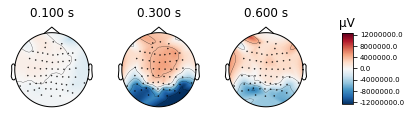

printing :  FM09_12.csv


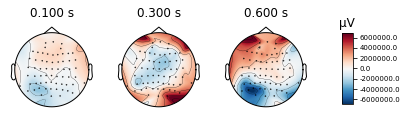

printing :  FM10_12.csv


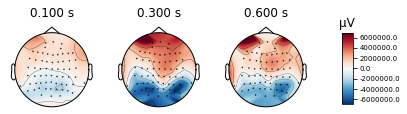

printing :  FM11_12.csv


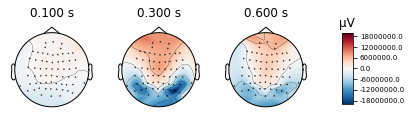

printing :  FM12_12.csv


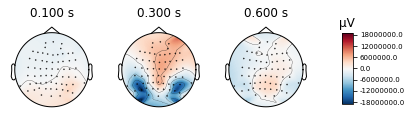

printing :  FM13_12.csv


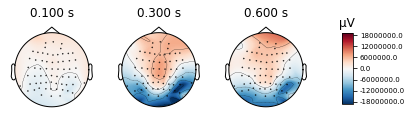

printing :  FM14_12.csv


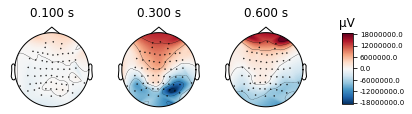

printing :  FM15_12.csv


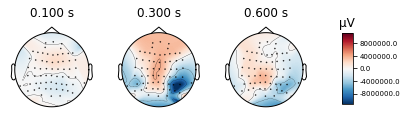

printing :  FM16_12.csv


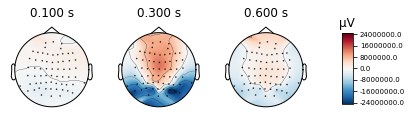

printing :  FM17_12.csv


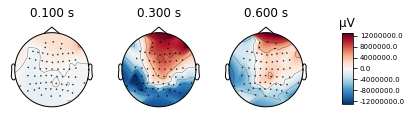

printing :  FM18_12.csv


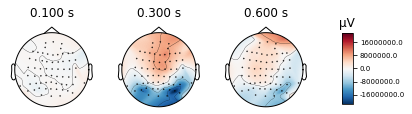

printing :  FM19_12.csv


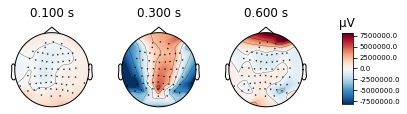

printing :  FM20_12.csv


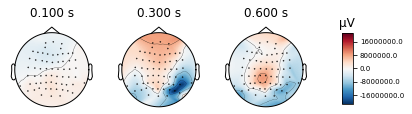

printing :  FM21_12.csv


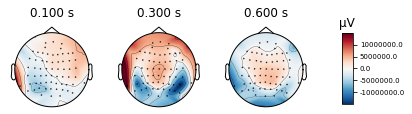

printing :  FM22_12.csv


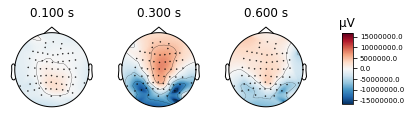

printing :  FM23_12.csv


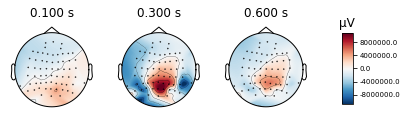

printing :  FM24_12.csv


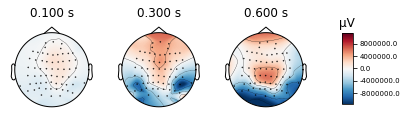

In [ ]:
#times to plot
times = [0.1, 0.3, 0.6]
#static fear stimuli
for key, value in fear_stim_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot_topomap(ch_type='eeg', times=times, colorbar=True)
  #fig.savefig('figures/scalp_topo/'+key[0:7]+'.pdf')

printing :  FM03_22.csv


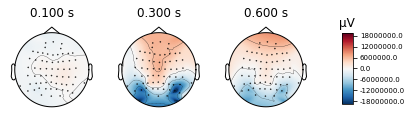

printing :  FM04_22.csv


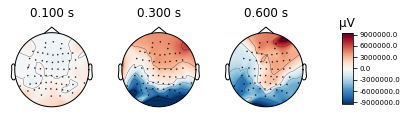

printing :  FM01_22.csv


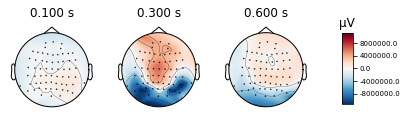

printing :  FM05_22.csv


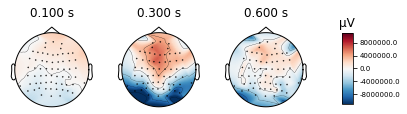

printing :  FM06_22.csv


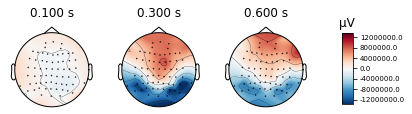

printing :  FM07_22.csv


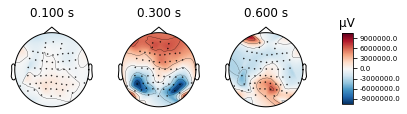

printing :  FM09_22.csv


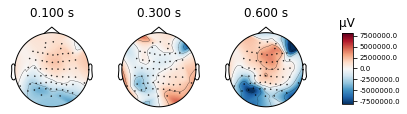

printing :  FM10_22.csv


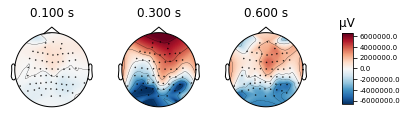

printing :  FM11_22.csv


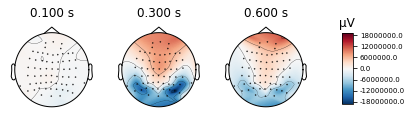

printing :  FM12_22.csv


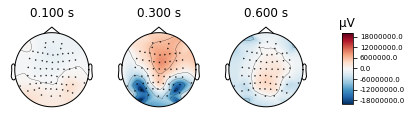

printing :  FM13_22.csv


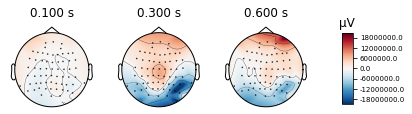

printing :  FM14_22.csv


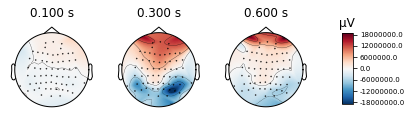

printing :  FM15_22.csv


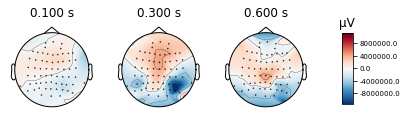

printing :  FM16_22.csv


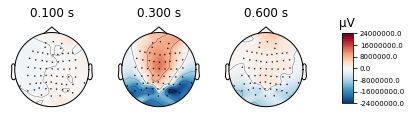

printing :  FM17_22.csv


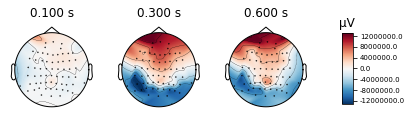

printing :  FM18_22.csv


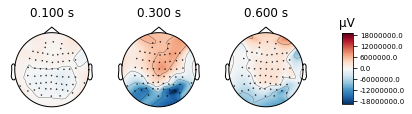

printing :  FM19_22.csv


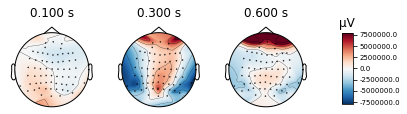

printing :  FM20_22.csv


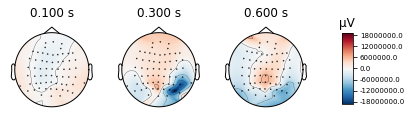

printing :  FM22_22.csv


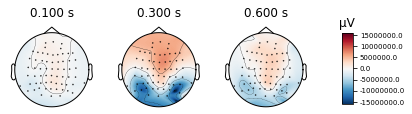

printing :  FM23_22.csv


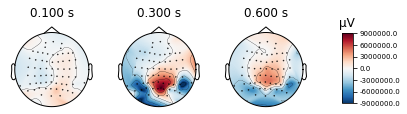

printing :  FM24_22.csv


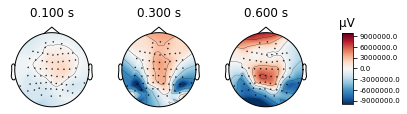

printing :  FM21_22.csv


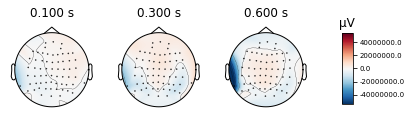

printing :  FM08_22.csv


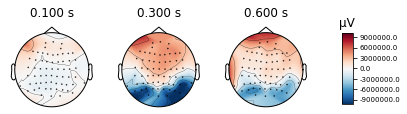

In [ ]:
#static anger stimuli
for key, value in anger_stim_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot_topomap(ch_type='eeg', times=times, colorbar=True)
  #fig.savefig('figures/scalp_topo/'+key[0:7]+'.pdf')

printing :  FM03_11.csv


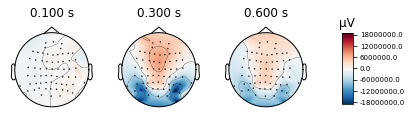

printing :  FM04_11.csv


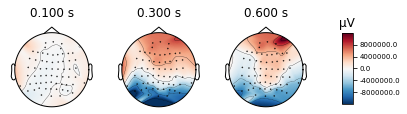

printing :  FM05_11.csv


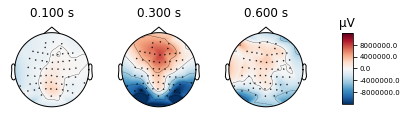

printing :  FM01_11.csv


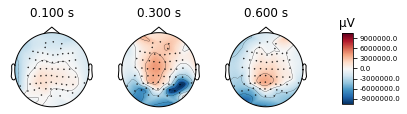

printing :  FM06_11.csv


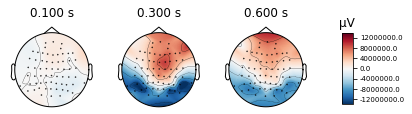

printing :  FM07_11.csv


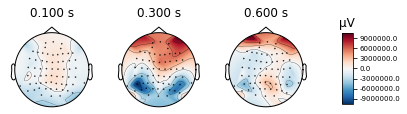

printing :  FM08_11.csv


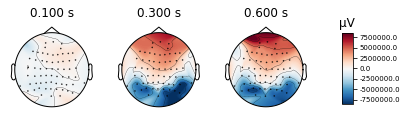

printing :  FM09_11.csv


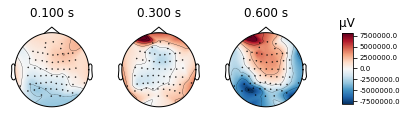

printing :  FM10_11.csv


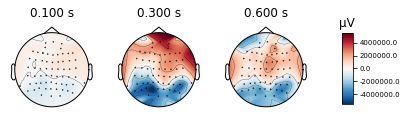

printing :  FM11_11.csv


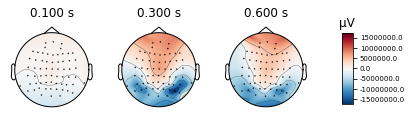

printing :  FM12_11.csv


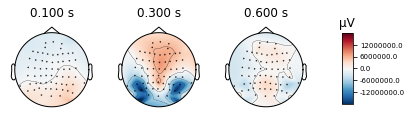

printing :  FM13_11.csv


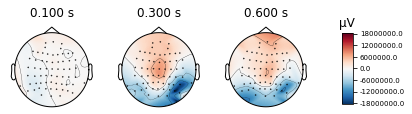

printing :  FM14_11.csv


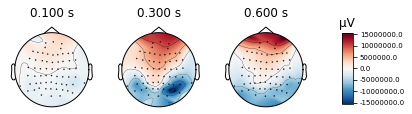

printing :  FM15_11.csv


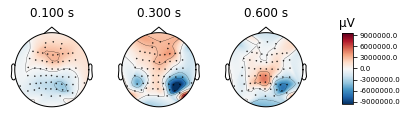

printing :  FM16_11.csv


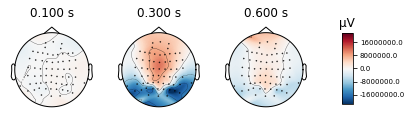

printing :  FM17_11.csv


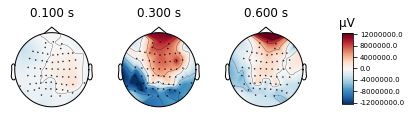

printing :  FM18_11.csv


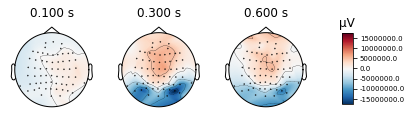

printing :  FM19_11.csv


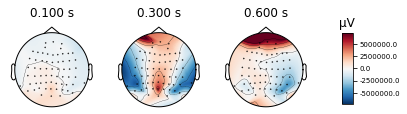

printing :  FM20_11.csv


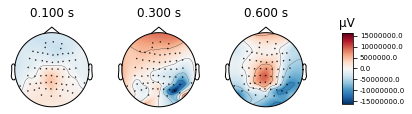

printing :  FM21_11.csv


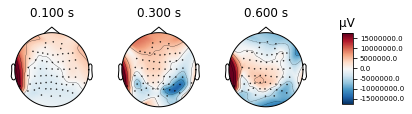

printing :  FM22_11.csv


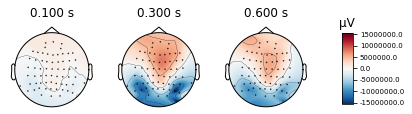

printing :  FM23_11.csv


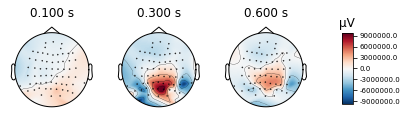

printing :  FM24_11.csv


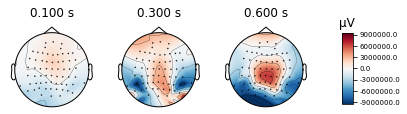

In [ ]:
#dynamic fear stimuli
for key, value in fear_dyn_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot_topomap(ch_type='eeg', times=times, colorbar=True)
  #fig.savefig('figures/scalp_topo/'+key[0:7]+'.pdf')

printing :  FM01_21.csv


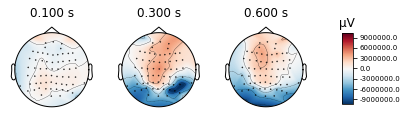

printing :  FM03_21.csv


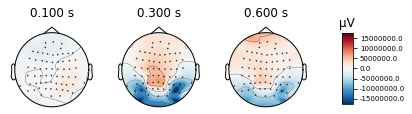

printing :  FM04_21.csv


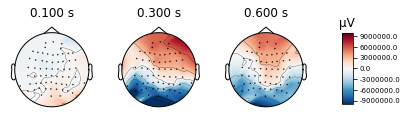

printing :  FM05_21.csv


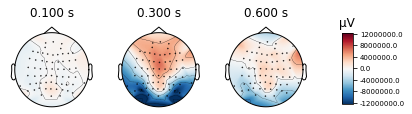

printing :  FM06_21.csv


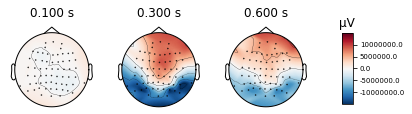

printing :  FM07_21.csv


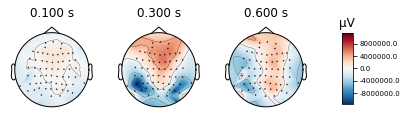

printing :  FM09_21.csv


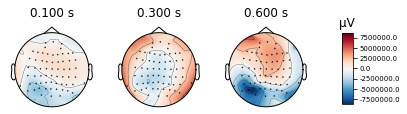

printing :  FM10_21.csv


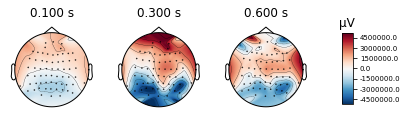

printing :  FM11_21.csv


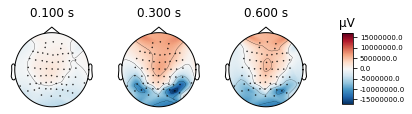

printing :  FM12_21.csv


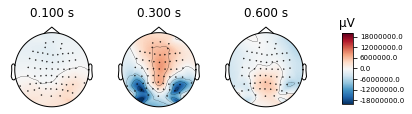

printing :  FM13_21.csv


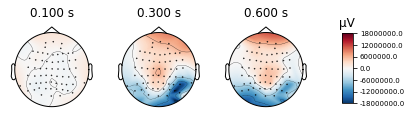

printing :  FM14_21.csv


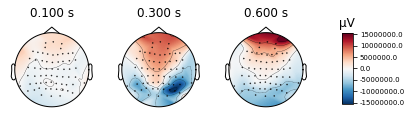

printing :  FM15_21.csv


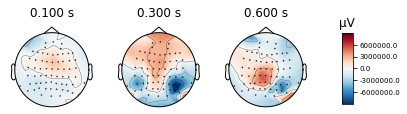

printing :  FM16_21.csv


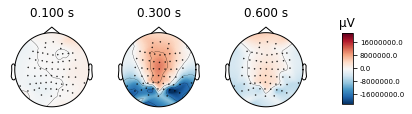

printing :  FM17_21.csv


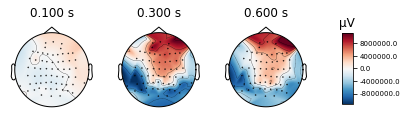

printing :  FM18_21.csv


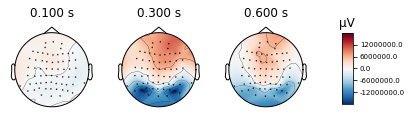

printing :  FM19_21.csv


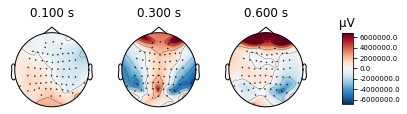

printing :  FM20_21.csv


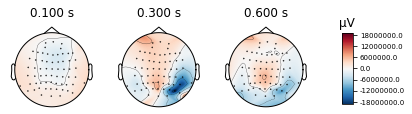

printing :  FM21_21.csv


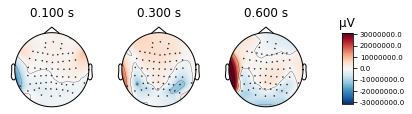

printing :  FM22_21.csv


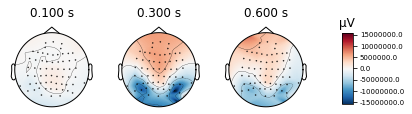

printing :  FM23_21.csv


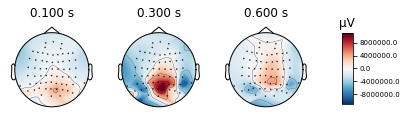

printing :  FM24_21.csv


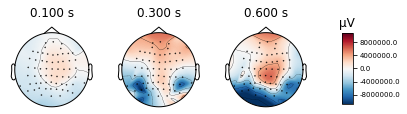

printing :  FM08_21.csv


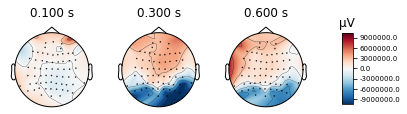

In [ ]:
#dynamic anger stimuli
for key, value in anger_dyn_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot_topomap(ch_type='eeg', times=times, colorbar=True)
  #fig.savefig('figures/scalp_topo/'+key[0:7]+'.pdf')

**Joint Plot**

In [ ]:
#static fear stimuli
for key, value in fear_stim_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot_joint(times=times)
  #fig.savefig('figures/plot_joint/'+key[0:7]+'.pdf')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#static anger stimuli
for key, value in anger_stim_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot_joint(times=times)
  #fig.savefig('figures/plot_joint/'+key[0:7]+'.pdf')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#dynamic fear stimuli
for key, value in fear_dyn_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot_joint(times=times)
  #fig.savefig('figures/plot_joint/'+key[0:7]+'.pdf')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#dynamic anger stimuli
for key, value in anger_dyn_data.items():
  evk = mne.EvokedArray(value, info=info)
  evk.set_montage(montage, match_case=False)
  print ("printing : ", key)
  fig = evk.plot_joint(times=times)
  #fig.savefig('figures/plot_joint/'+key[0:7]+'.pdf')

Output hidden; open in https://colab.research.google.com to view.